In [22]:
import pandas as pd 

In [23]:
df = pd.read_csv("states.csv")
df.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


In [24]:
df = df.drop(columns=['state'])
df.head()

,metro_res,white,hs_grad,poverty,female_house
0,55.4,71.3,79.9,14.6,14.2
1,65.6,70.8,90.6,8.3,10.8
2,88.2,87.7,83.8,13.3,11.1
3,52.5,81.0,80.9,18.0,12.1
4,94.4,77.5,81.1,12.8,12.6


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt 

Проверить факторы на наличие коллинеарности. Для этого построить матрицу корреляций. Отобрать неколлинеарные факторы. Факторы считать неколлинеарными при условии, что коэффициент корреляции не превосходит 0,7.

<Axes: >

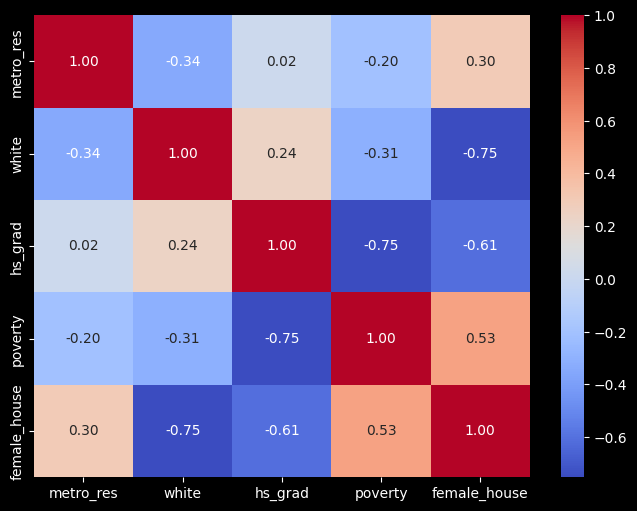

In [26]:
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns)

abs(corr_i) > 70%: 
- female_house & white

In [27]:
import numpy as np
def calc_target(A: np.ndarray, B: np.ndarray) -> np.ndarray:
    A_inv = np.linalg.inv(A)
    A_inv_A = A_inv @ A
    A_inv_B = A_inv @ B
    return np.linalg.solve(A_inv_A, A_inv_B)


In [28]:
df = df.drop(columns=['white'])
corr_mtrx = df.corr()

Построить уравнение линейной множественной регрессии

In [29]:
lst_x = list()
req_cols = ['metro_res', 'hs_grad', 'female_house']
for x in req_cols:
    lst_x.append(df[x])

n = len(df)
y = df['poverty'].values

first_row = [n] + [np.sum(x) for x in lst_x]

dot_matrix = [[np.sum(xi * xj) for xj in lst_x] for xi in lst_x]

rows_with_leading_sums = [
    [np.sum(xi)] + row for xi, row in zip(lst_x, dot_matrix)
]

matrix_A = np.array([first_row] + rows_with_leading_sums)

In [30]:
matrix_B = np.array([
    np.sum(y),
    *[np.sum(y * df[col].values) for col in req_cols]
])
matrix_B

array([  578.8 , 41334.28, 49352.39,  6925.2 ])

In [31]:
b0, b1, b2, b3 = calc_target(matrix_A, matrix_B)
b0, b1, b2, b3

(np.float64(54.05960674292253),
 np.float64(-0.0539626387881153),
 np.float64(-0.4942286842366607),
 np.float64(0.31784887498027836))

In [32]:
df['pov_model'] = b0 + (b1 * df['metro_res']) + \
                  (b2 * df['hs_grad'])   + (b3 * df['female_house']) 

Определить значение коэффициента множественной корреляции R и коэффициента детерминации R2

In [33]:
pov_mean = np.mean(df['poverty'])
diff = (df['poverty'] - df['pov_model'])
num = np.sum(diff * diff)
denum = np.sum((df['poverty'] - pov_mean) * (df['poverty'] - pov_mean))

In [34]:
R_squared = 1 - (num / denum)
R = np.sqrt(R_squared)
print('R_squared: ', R_squared)
print('R: ', R)

R_squared:  0.6250554112179456
R:  0.7906044593966983


Проверить значимость уравнения регрессии

In [16]:
F = (R_squared/(1 - R_squared))  * ((n - 3 - 1) / 3)
F

np.float64(26.11728524355358)

Проверить значимость коэффициентов уравнения регрессии

<Axes: >

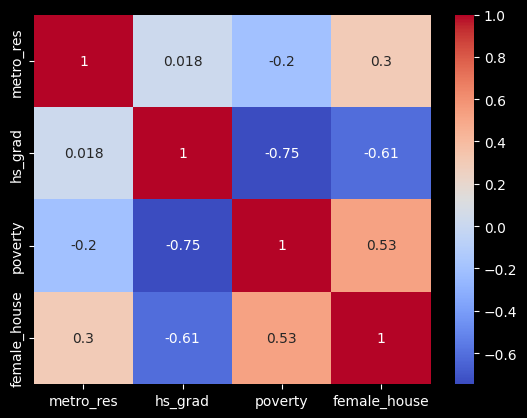

In [17]:
sns.heatmap(corr_mtrx, cmap='coolwarm', annot=True)

In [18]:
metro_res = corr_mtrx['metro_res']['poverty']
hs_grad = corr_mtrx['hs_grad']['poverty']
female_house = corr_mtrx['female_house']['poverty']
print("t_metro_res:", metro_res)
print("t_hs_grad:", hs_grad)
print("t_female_house:", female_house)

t_metro_res: -0.20423476556056971
t_hs_grad: -0.7468582531582509
t_female_house: 0.5253969842079924


In [20]:
t_metro_res = metro_res * np.sqrt((n - 2) / (1 - metro_res**2))
t_hs_grad = hs_grad * np.sqrt((n - 2) / (1 - hs_grad**2))
t_female_house = female_house * np.sqrt((n - 2) / (1 - female_house**2))

print("t_metro_res:", t_metro_res)
print("t_hs_grad:", t_hs_grad)
print("t_female_house:", t_female_house)

t_metro_res: -1.4604263154681445
t_hs_grad: -7.861863607904187
t_female_house: 4.322439538154278


In [21]:
from scipy.stats import t
alpha = 0.05
dff = n - 3 - 1
t_critical = t.ppf(1 - alpha/2, dff)
print(f"Критическое t-значение: {t_critical:.4f}")

Критическое t-значение: 2.0117


Построить уравнение линейной множественной регрессии с учетом только значимых факторов

In [35]:
df.head()

,metro_res,hs_grad,poverty,female_house,pov_model
0,55.4,79.9,14.6,14.2,16.094659
1,65.6,90.6,8.3,10.8,9.175307
2,88.2,83.8,13.3,11.1,11.411861
3,52.5,80.9,18.0,12.1,15.089439
4,94.4,81.1,12.8,12.6,12.888483


In [37]:
X = df[['female_house', 'hs_grad']]
X = X.to_numpy()

y = df['poverty']
y = y.to_numpy()

# Добавление единичного столбца (для b0)
X_features = np.hstack([np.ones((X.shape[0], 1)), X])

# Расчёт матриц для МНК
XtX = X_features.T @ X_features
Xty = X_features.T @ y

beta = np.linalg.solve(XtX, Xty)

beta

array([58.3202572 ,  0.14385005, -0.5655586 ])

Оценка качества модели

In [38]:
y_mean = np.mean(y)
y_hat = X_features @ beta
y_hat

array([15.17479582,  8.63422864, 12.52318213, 14.30715212, 14.26596542,
        9.53616992, 10.57446536, 10.03964509, 12.40098361, 12.14364444,
       12.27704612, 10.05206178,  9.68948417, 11.50812913, 11.05272977,
        8.82676127,  9.54957076, 13.18943576, 15.57659181, 10.70945797,
       10.8056096 , 10.77191879, 10.57544952,  7.79535494, 14.8855048 ,
       10.05009346,  8.64369284,  8.27657183, 11.50517665,  7.54134565,
       11.38161657, 14.0129403 , 12.81481887, 14.08191284,  8.71168123,
       10.74413294, 11.49177581, 10.58294541, 11.35087824, 14.3656763 ,
       14.75210312,  9.44985989, 14.3656763 , 16.48602897,  9.11150889,
        9.37990318, 10.37602777,  9.35310149, 15.34999097,  9.59272578,
        8.16247595])

In [39]:
ssr = np.sum((y - y_hat) ** 2)  # ошибка модели.
sst = np.sum((y - y_mean) ** 2) # общая изменчивость данных.
R_squared = 1 - ssr / sst   # R²

In [41]:
n = len(y)                   
m = X.shape[1]               
F = (R_squared / (1 - R_squared)) * ((n - m - 1) / m)

R_squared, F

(np.float64(0.5652796734255746), np.float64(31.207908470990557))

In [42]:
from scipy.stats import f
alpha = 0.05
d1 = m
d2 = n - m - 1

(F_crit := f.ppf(1 - alpha, d1, d2))


np.float64(3.1907273359284987)

In [44]:
from itertools import combinations

cols = ['metro_res', 'female_house', 'hs_grad']
new_cols = ['metro_res', 'female_house', 'hs_grad']

data = df[cols]
new_data = data.copy()

for col1, col2 in combinations(cols, 2):
    new_name = f'{col1}__{col2}'
    new_data[new_name] = data[col1] * data[col2]
    new_cols.append(new_name)

new_data.head(5)

,metro_res,female_house,hs_grad,metro_res__female_house,metro_res__hs_grad,female_house__hs_grad
0,55.4,14.2,79.9,786.68,4426.46,1134.58
1,65.6,10.8,90.6,708.48,5943.36,978.48
2,88.2,11.1,83.8,979.02,7391.16,930.18
3,52.5,12.1,80.9,635.25,4247.25,978.89
4,94.4,12.6,81.1,1189.44,7655.84,1021.86


In [45]:
X = new_data.to_numpy() 
y = df['poverty'].to_numpy() 

X_features = np.hstack([np.ones((X.shape[0], 1)), X])
XtX = X_features.T @ X_features
Xty = X_features.T @ y

(beta := np.linalg.solve(XtX, Xty))


array([ 4.87213986e+01, -1.19506300e+00,  6.81111385e+00, -2.31250758e-01,
        2.09799750e-02,  1.07516100e-02, -9.55011890e-02])

In [46]:
y_mean = np.mean(y)
y_hat = X_features @ beta      

ssr = np.sum((y - y_hat) ** 2)

sst = np.sum((y - y_mean) ** 2)

R_squared = 1 - ssr / sst

n = len(y)
m = X.shape[1]
F = (R_squared / (1 - R_squared)) * ((n - m - 1) / m)

alpha = 0.05
df1 = m
df2 = n - m - 1
F_crit = f.ppf(1 - alpha, df1, df2)

R_squared

np.float64(0.6817261975973622)

In [48]:
F, F_crit

(np.float64(15.707624728480916), np.float64(2.3132637931051208))

Корреляционный анализ

In [49]:
for col in range(0, X.shape[1]):
    x = X[:, col]
    x_mean, y_mean = x.mean(), y.mean()
    r_xy = np.corrcoef(x, y)[0][1]
    t_r = r_xy * np.sqrt((n - 2) / (1 - r_xy**2))
    alpha = 0.05
    t_crit = t.ppf(1 - alpha/2, df=n-2)

    print("Признак: ", new_cols[col])
    print("r_xy:", r_xy)
    print("t_кр: ", t_crit)
    print("t_r: ", t_r)

    if abs(t_r) > t_crit:
      print("ВЫВОД: Значимо", end='\n\n')
    else:
      print("ВЫВОД: Не значимо", end='\n\n')


Признак:  metro_res
r_xy: -0.20423476556056963
t_кр:  2.0095752371292392
t_r:  -1.4604263154681436
ВЫВОД: Не значимо

Признак:  female_house
r_xy: 0.5253969842079923
t_кр:  2.0095752371292392
t_r:  4.322439538154276
ВЫВОД: Значимо

Признак:  hs_grad
r_xy: -0.7468582531582507
t_кр:  2.0095752371292392
t_r:  -7.861863607904183
ВЫВОД: Значимо

Признак:  metro_res__female_house
r_xy: 0.17936469191696267
t_кр:  2.0095752371292392
t_r:  1.276250237053057
ВЫВОД: Не значимо

Признак:  metro_res__hs_grad
r_xy: -0.3387565333548004
t_кр:  2.0095752371292392
t_r:  -2.5203115008747434
ВЫВОД: Значимо

Признак:  female_house__hs_grad
r_xy: 0.40354451624218685
t_кр:  2.0095752371292392
t_r:  3.087360733689979
ВЫВОД: Значимо



In [ ]:
important_features = [
    'female_house',
    'hs_grad',
    'metro_res',
    'metro_res__hs_grad',
    'female_house__hs_grad'
    'metro_res_x_female_house'
]

In [50]:
import statsmodels.api as sm

X = df[['female_house', 'hs_grad']].to_numpy()
y = df['poverty'].to_numpy()

X_interactions = np.column_stack([
    X[:, 0] * X[:, 1],
    df['metro_res'].values * X[:, 1]
])

X_final = np.hstack([X, X_interactions])

In [51]:
X_final = sm.add_constant(X_final)
model = sm.OLS(y, X_final).fit()

In [52]:
beta = np.linalg.inv(X_final.T @ X_final) @ X_final.T @ y  
y_hat_new = X_final @ beta                               

ssr_new = np.sum((y - y_hat_new) ** 2)
sst_new = np.sum((y - np.mean(y)) ** 2)
R_squared_new = 1 - (ssr_new / sst_new)

print(f"R² обновлённой модели: {R_squared_new:.4f}")

R² обновлённой модели: 0.6327


In [53]:
print(f"Старый R²: {R_squared:.4f}")
print(f"Новый R²: {R_squared_new:.4f}")
print(f"Улучшение: {R_squared_new - R_squared:.4f}")

Старый R²: 0.6817
Новый R²: 0.6327
Улучшение: -0.0490


Вывод: модель, к сожалению ухудшилась, по сравнению с первой
